In [77]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

In [78]:
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [79]:
tree = pd.read_csv("counterparts.csv")
tree.head()

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type           Chimp Bonobo         Gorilla Orangutan  \
0  processed_transcript             NaN    NaN  TCONS_00002209       NaN   
1  processed_transcript  TCONS_00105507    NaN  TCONS_00004763       NaN   
2  processed_transcript  TCONS_00014887    NaN             NaN       NaN   
3       retained_intron  TCONS_00014887    NaN             NaN       NaN   
4       retained_intron  TCONS_00000971    NaN             NaN       NaN   

  Rhesus          MacFas            Atys          Baboon     GreenMonkey  \
0    NaN  TCONS_00006064             NaN  TCONS_00007527             NaN   
1    NaN             NaN             NaN             NaN             NaN   
2    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
3    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
4    NaN  TCONS_00099677  TCONS_00041968  TCONS_00058452  TCONS_00047740   

         Marmoset Lemur  
0  TCONS_00071349   NaN  
1             NaN   NaN  
2             NaN   NaN  
3             NaN   NaN  
4             NaN   NaN

In [80]:
df = tree.copy()
df['Human'] = 0
df.head()

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type           Chimp Bonobo         Gorilla Orangutan  \
0  processed_transcript             NaN    NaN  TCONS_00002209       NaN   
1  processed_transcript  TCONS_00105507    NaN  TCONS_00004763       NaN   
2  processed_transcript  TCONS_00014887    NaN             NaN       NaN   
3       retained_intron  TCONS_00014887    NaN             NaN       NaN   
4       retained_intron  TCONS_00000971    NaN             NaN       NaN   

  Rhesus          MacFas            Atys          Baboon     GreenMonkey  \
0    NaN  TCONS_00006064             NaN  TCONS_00007527             NaN   
1    NaN             NaN             NaN             NaN             NaN   
2    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
3    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
4    NaN  TCONS_00099677  TCONS_00041968  TCONS_00058452  TCONS_00047740   

         Marmoset Lemur  Human  
0  TCONS_00071349   NaN      0  
1             NaN   NaN      0  
2             NaN   NaN      0  
3             NaN   NaN      0  
4             NaN   NaN      0

In [81]:
df.loc[df['Chimp'].notnull(), 'Chimp'] = 1
df.loc[df['Bonobo'].notnull(), 'Bonobo'] = 2
df.loc[df['Gorilla'].notnull(), 'Gorilla'] = 3
df.loc[df['Orangutan'].notnull(), 'Orangutan'] = 4
df.loc[df['Rhesus'].notnull(), 'Rhesus'] = 5
df.loc[df['MacFas'].notnull(), 'MacFas'] = 6
df.loc[df['Atys'].notnull(), 'Atys'] = 7
df.loc[df['Baboon'].notnull(), 'Baboon'] = 8
df.loc[df['GreenMonkey'].notnull(), 'GreenMonkey'] = 9
df.loc[df['Marmoset'].notnull(), 'Marmoset'] = 10
df.loc[df['Lemur'].notnull(), 'Lemur'] = 11
#df.fillna(0, inplace=True)
df.head()

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type Chimp Bonobo Gorilla Orangutan Rhesus MacFas Atys  \
0  processed_transcript   NaN    NaN       3       NaN    NaN      6  NaN   
1  processed_transcript     1    NaN       3       NaN    NaN    NaN  NaN   
2  processed_transcript     1    NaN     NaN       NaN    NaN      6    7   
3       retained_intron     1    NaN     NaN       NaN    NaN      6    7   
4       retained_intron     1    NaN     NaN       NaN    NaN      6    7   

  Baboon GreenMonkey Marmoset Lemur  Human  
0      8         NaN       10   NaN      0  
1    NaN         NaN      NaN   NaN      0  
2      8           9      NaN   NaN      0  
3      8           9      NaN   NaN      0  
4      8           9      NaN   NaN      0

In [82]:
#df['max_value'] = df.max(axis=1)
df['Max_distance'] = df[["Human",'Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']].max(axis=1)
df['Min_distance'] = df[['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']].min(axis=1)
df['Branch'] = df[['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                   'MacFas','Atys','Baboon','GreenMonkey','Marmoset',
                   'Lemur']].apply(lambda row: ','.join(row.dropna().astype(int).astype(str)), axis=1)

df.head(5)

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type Chimp Bonobo Gorilla Orangutan    ...     MacFas Atys  \
0  processed_transcript   NaN    NaN       3       NaN    ...          6  NaN   
1  processed_transcript     1    NaN       3       NaN    ...        NaN  NaN   
2  processed_transcript     1    NaN     NaN       NaN    ...          6    7   
3       retained_intron     1    NaN     NaN       NaN    ...          6    7   
4       retained_intron     1    NaN     NaN       NaN    ...          6    7   

  Baboon GreenMonkey Marmoset Lemur Human  Max_distance  Min_distance  \
0      8         NaN       10   NaN     0          10.0           3.0   
1    NaN         NaN      NaN   NaN     0           3.0           1.0   
2      8           9      NaN   NaN     0           9.0           1.0   
3      8           9      NaN   NaN     0           9.0           1.0   
4      8           9      NaN   NaN     0           9.0           1.0   

      Branch  
0   3,6,8,10  
1        1,3  
2  1,6,7,8,9  
3  1,6,7,8,9  
4  1,6,7,8,9  

[5 rows x 21 columns]

# Stat

In [83]:
df["Branch"].value_counts()

                           785
1,2,3,4,5,6,7,8,9,10,11    325
1                          211
3                          197
6                          165
10                         148
8                          130
1,2,3,4,5,6,7,8,9,10       127
7                          121
9                          115
5                          107
1,2,3,4,6,7,8,9,10,11       91
1,3,4,5,6,7,8,9,10          83
1,6                         76
11                          75
1,3,4,5,6,7,8,9,10,11       75
1,2,3,4,6,7,8,9,10          71
1,7                         70
1,2,3,5,6,7,8,9,10,11       69
1,3                         69
6,8                         59
1,2,3,5,6,7,8,9,10          57
1,3,5,6,7,8,9,10            56
1,5                         53
1,8                         53
6,7                         52
4                           51
1,10                        50
3,8                         47
8,10                        45
                          ... 
2,3,6,7,8,9,10               1
1,2,3,5,

In [84]:
grouped = df.groupby("Transcript.type")
#grouped["Branch"].value_counts()

In [85]:
#grouped["Max_distance"].value_counts()

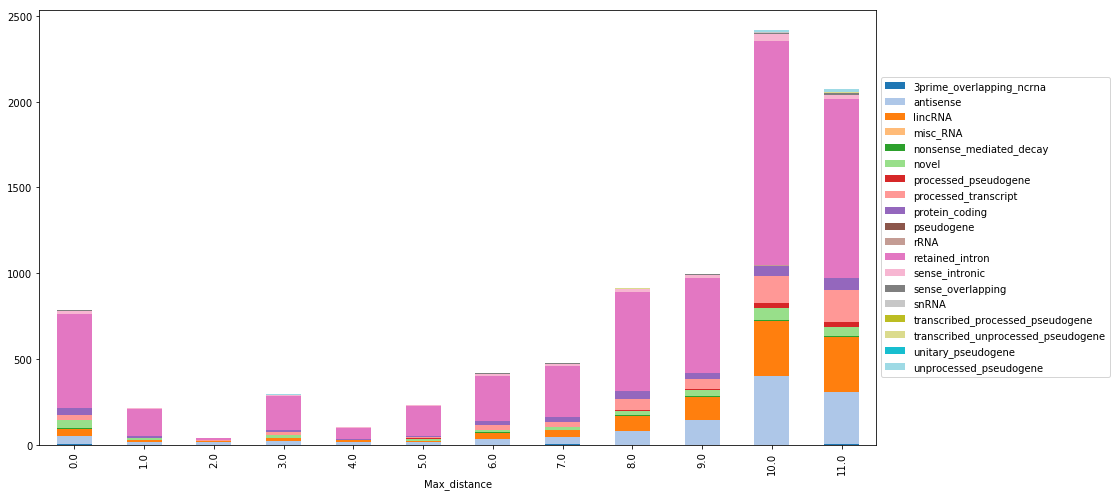

In [86]:
df.groupby(['Max_distance', 'Transcript.type']).size().unstack().plot(kind='bar',
                                                                         stacked=True, figsize=(15, 8),
                                                                         cmap="tab20", legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


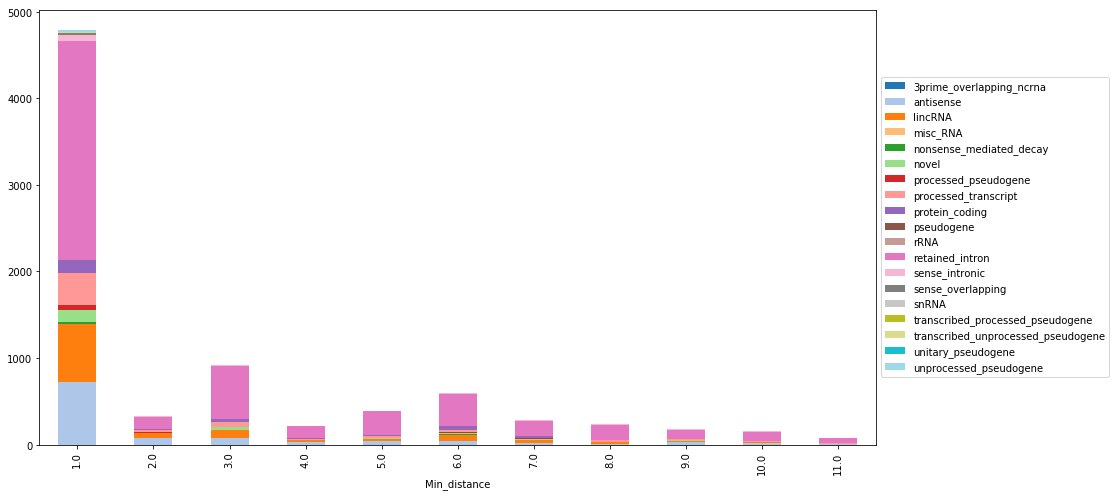

In [87]:
df.groupby(['Min_distance', 'Transcript.type']).size().unstack().plot(kind='bar',
                                                                         stacked=True, figsize=(15, 8),
                                                                         cmap="tab20", legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [88]:
df1= df.groupby("Branch").filter(lambda x: len(x) > 20)

df1.groupby(['Branch', 'Transcript.type']).size().unstack().plot(kind='bar',
                                                                         stacked=True, figsize=(15, 8),
                                                                         cmap="tab20", legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

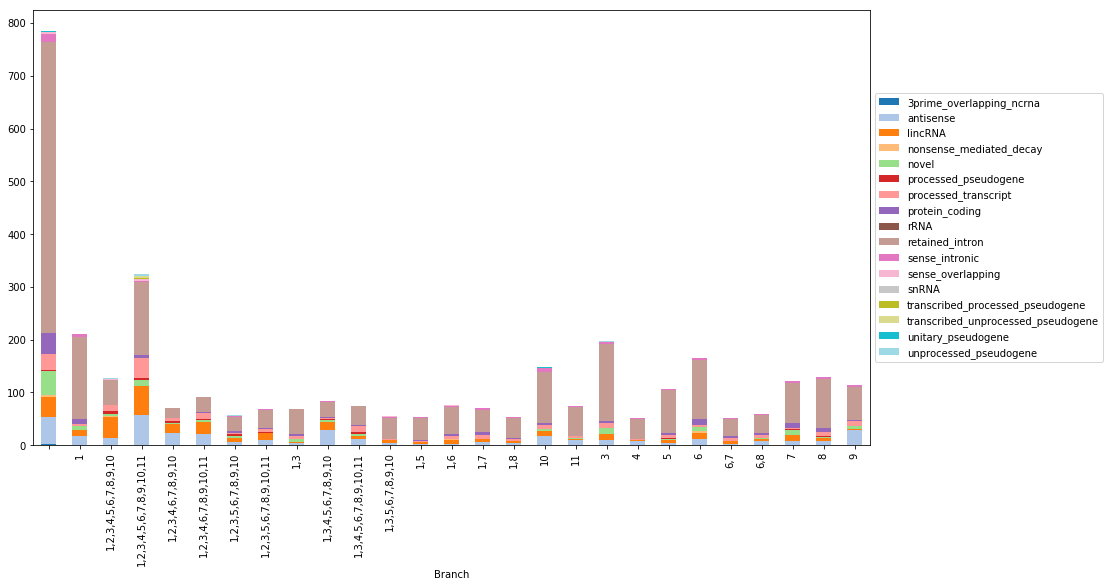

In [89]:
df1= df.groupby("Branch").filter(lambda x: len(x) > 50)

df1.groupby(['Branch', 'Transcript.type']).size().unstack().plot(kind='bar',
                                                                         stacked=True, figsize=(15, 8),
                                                                         cmap="tab20", legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [90]:
df.rename(columns={'Transcript.type': 'Transcript_type'}, inplace=True)
z= df.Transcript_type.unique().tolist()

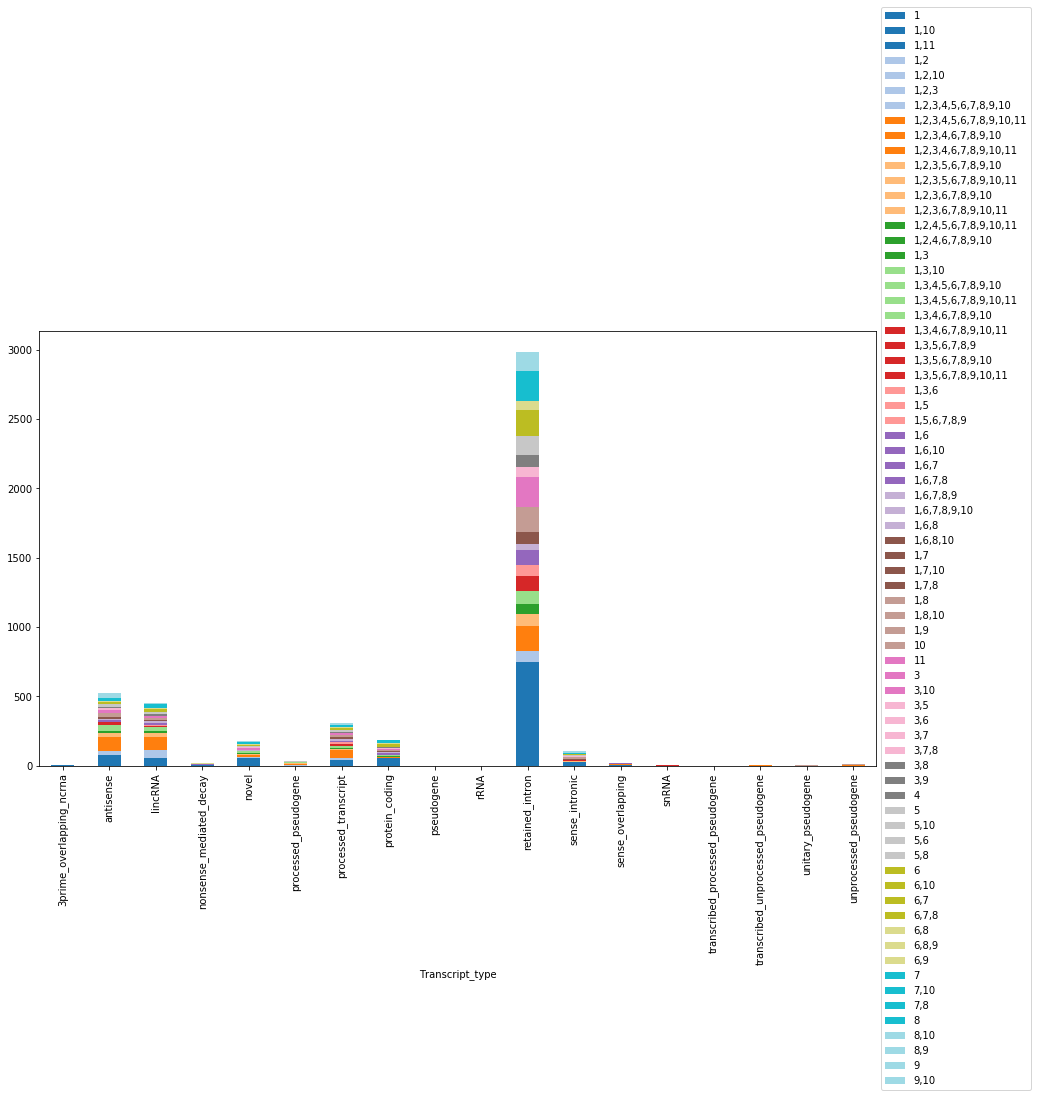

In [91]:
df1= df.groupby("Branch").filter(lambda x: len(x) > 20)

df1.groupby(['Transcript_type', 'Branch']).size().unstack().plot(kind='bar',
                                                                         stacked=True, figsize=(15, 8),
                                                                         cmap="tab20", legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [92]:
t1 = grouped.get_group("antisense")
result = t1["Max_distance"].value_counts(normalize=True)
for i in z:
    t1 = grouped.get_group(i)
    t2 = t1["Max_distance"].value_counts(normalize=True)
    t2.name = i
    result = pd.concat([result, t2], axis=1)

result = result.drop("Max_distance", axis=1)    
result = result.fillna(0)
result.to_csv("~/Desktop/result.csv", sep='\t')
result


processed_transcript  retained_intron   lincRNA  antisense  \
0.0               0.049834         0.105758  0.037864   0.044855   
1.0               0.006645         0.029750  0.011650   0.014952   
2.0               0.003322         0.002879  0.006796   0.013193   
3.0               0.028239         0.038772  0.015534   0.021108   
4.0               0.004983         0.013052  0.009709   0.013193   
5.0               0.013289         0.033205  0.008738   0.011434   
6.0               0.048173         0.051056  0.035922   0.027265   
7.0               0.048173         0.057390  0.038835   0.036939   
8.0               0.109635         0.110749  0.084466   0.070361   
9.0               0.101329         0.106526  0.127184   0.128408   
10.0              0.269103         0.250864  0.313592   0.350044   
11.0              0.317276         0.200000  0.309709   0.268250   

      unprocessed_pseudogene     novel  processed_pseudogene  protein_coding  \
0.0                 0.000000  0.153333              0.014925        0.126154   
1.0                 0.000000  0.023333              0.000000        0.030769   
2.0                 0.000000  0.003333              0.000000        0.003077   
3.0                 0.034483  0.060000              0.000000        0.027692   
4.0                 0.000000  0.003333              0.000000        0.006154   
5.0                 0.000000  0.043333              0.014925        0.027692   
6.0                 0.034483  0.046667              0.000000        0.064615   
7.0                 0.000000  0.050000              0.029851        0.086154   
8.0                 0.137931  0.096667              0.029851        0.135385   
9.0                 0.034483  0.113333              0.089552        0.104615   
10.0                0.206897  0.243333              0.388060        0.181538   
11.0                0.551724  0.163333              0.432836        0.206154   

      sense_intronic  nonsense_mediated_decay  sense_overlapping  \
0.0          0.10000                 0.090909            0.12500   
1.0          0.03750                 0.000000            0.00000   
2.0          0.00000                 0.000000            0.00000   
3.0          0.03125                 0.000000            0.03125   
4.0          0.01250                 0.000000            0.00000   
5.0          0.01875                 0.000000            0.00000   
6.0          0.06875                 0.151515            0.06250   
7.0          0.08125                 0.090909            0.06250   
8.0          0.13750                 0.090909            0.00000   
9.0          0.09375                 0.212121            0.15625   
10.0         0.25625                 0.090909            0.28125   
11.0         0.16250                 0.272727            0.28125   

      3prime_overlapping_ncrna  transcribed_unprocessed_pseudogene  rRNA  \
0.0                       0.50                               0.000   0.0   
1.0                       0.00                               0.000   0.0   
2.0                       0.00                               0.000   0.0   
3.0                       0.00                               0.000   0.0   
4.0                       0.00                               0.000   0.0   
5.0                       0.00                               0.000   0.0   
6.0                       0.00                               0.000   0.0   
7.0                       0.25                               0.000   0.0   
8.0                       0.00                               0.125   0.0   
9.0                       0.00                               0.000   0.0   
10.0                      0.00                               0.375   1.0   
11.0                      0.25                               0.500   0.0   

      unitary_pseudogene  misc_RNA  snRNA  transcribed_processed_pseudogene  \
0.0             0.333333       0.0    0.0                               0.0   
1.0             0.000000       0.0    0.0       

In [93]:
result.plot.bar(figsize=(15,20), subplots=True,layout=(6,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f201862f518>,
      dtype=object)

In [94]:
t1 = grouped.get_group("antisense")
result2 = t1["Min_distance"].value_counts(normalize=True)
for i in z:
    t1 = grouped.get_group(i)
    t2 = t1["Min_distance"].value_counts(normalize=True)
    t2.name = i
    result2 = pd.concat([result2, t2], axis=1)

result2 = result2.drop("Min_distance", axis=1)    
result2

processed_transcript  retained_intron   lincRNA  antisense  \
1.0               0.636364         0.542820  0.674067   0.670350   
2.0               0.048951         0.030264  0.055499   0.069061   
3.0               0.106643         0.130071  0.085772   0.072744   
4.0               0.022727         0.029620  0.026236   0.023020   
5.0               0.045455         0.057738  0.023209   0.034991   
6.0               0.052448         0.079202  0.066599   0.040516   
7.0               0.019231         0.037776  0.033300   0.020258   
8.0               0.026224         0.036274  0.015136   0.011050   
9.0               0.020979         0.022322  0.007064   0.033149   
10.0              0.013986         0.022108  0.010091   0.016575   
11.0              0.006993         0.011805  0.003027   0.008287   

      unprocessed_pseudogene     novel  processed_pseudogene  protein_coding  \
1.0                 0.724138  0.574803              0.818182        0.545775   
2.0                 0.034483  0.035433              0.015152        0.028169   
3.0                 0.103448  0.133858              0.060606        0.112676   
4.0                 0.103448  0.007874                   NaN        0.017606   
5.0                      NaN  0.055118              0.045455        0.038732   
6.0                 0.034483  0.082677              0.030303        0.137324   
7.0                      NaN  0.051181              0.015152        0.049296   
8.0                      NaN  0.015748              0.015152        0.038732   
9.0                      NaN  0.023622                   NaN        0.014085   
10.0                     NaN  0.015748                   NaN        0.014085   
11.0                     NaN  0.003937                   NaN        0.003521   

      sense_intronic  nonsense_mediated_decay  sense_overlapping  \
1.0         0.423611                 0.500000           0.857143   
2.0         0.069444                      NaN                NaN   
3.0         0.097222                 0.066667           0.071429   
4.0         0.041667                 0.033333                NaN   
5.0         0.062500                      NaN                NaN   
6.0         0.083333                 0.266667                NaN   
7.0         0.055556                 0.066667                NaN   
8.0         0.062500                 0.033333           0.035714   
9.0         0.034722                 0.033333                NaN   
10.0        0.055556                      NaN           0.035714   
11.0        0.013889                      NaN                NaN   

      3prime_overlapping_ncrna  transcribed_unprocessed_pseudogene  rRNA  \
1.0                        0.5                                 1.0   1.0   
2.0                        0.5                                 NaN   NaN   
3.0                        NaN                                 NaN   NaN   
4.0                        NaN                                 NaN   NaN   
5.0                        NaN                                 NaN   NaN   
6.0                        NaN                                 NaN   NaN   
7.0                        NaN                                 NaN   NaN   
8.0                        NaN                                 NaN   NaN   
9.0                        NaN                                 NaN   NaN   
10.0                       NaN                                 NaN   NaN   
11.0                       NaN                                 NaN   NaN   

      unitary_pseudogene  misc_RNA  snRNA  transcribed_processed_pseudogene  \
1.0                  0.5       1.0    1.0                               1.0   
2.0                  NaN       NaN    NaN                               NaN   
3.0                  NaN       NaN    NaN                               NaN   
4.0                  NaN       NaN    NaN                               NaN   
5.0                  NaN       NaN    NaN                               NaN   
6.0                  NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2017a62da0>,
      dtype=object)

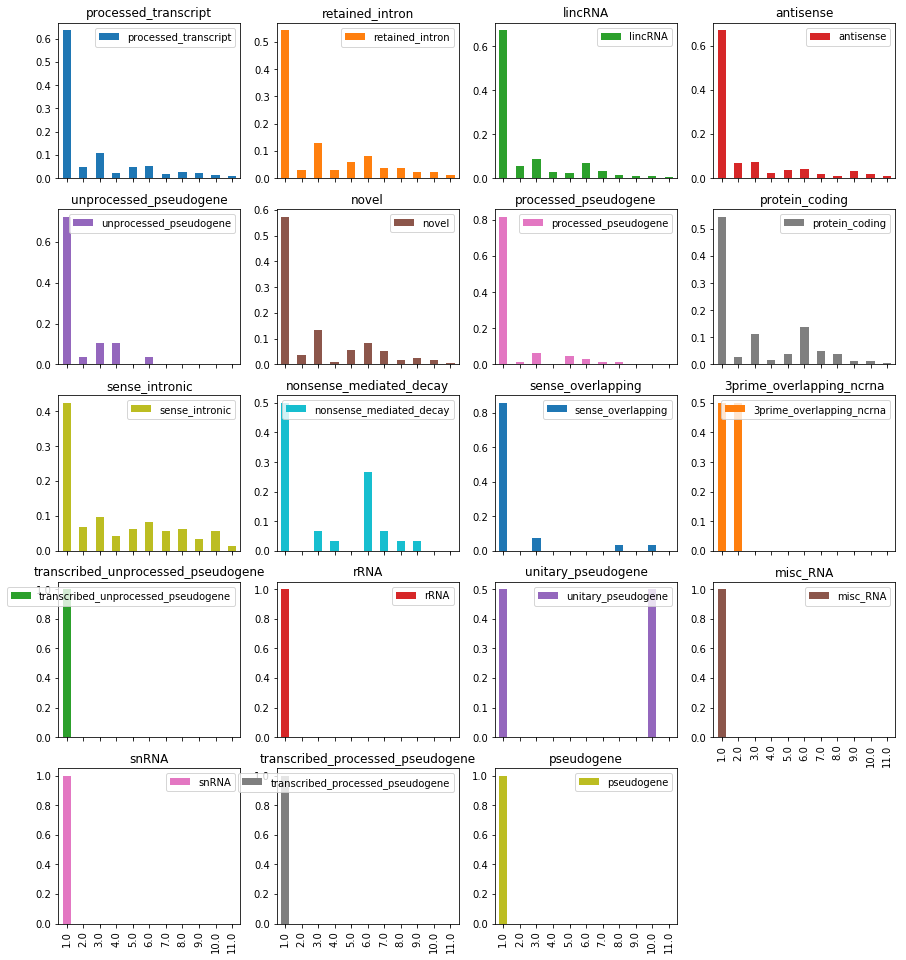

In [95]:
result2.plot.bar(figsize=(15,20), subplots=True,layout=(6,4))

# Tables and visualization

In [96]:
result = result.drop("pseudogene", axis=1)
result = result.drop("transcribed_processed_pseudogene", axis=1) 
result = result.drop("snRNA", axis=1) 
result = result.drop("misc_RNA", axis=1) 
result = result.drop("unitary_pseudogene", axis=1) 
result = result.drop("rRNA", axis=1) 
result = result.drop("transcribed_unprocessed_pseudogene", axis=1) 
result = result.drop("3prime_overlapping_ncrna", axis=1) 
result = result.drop("sense_overlapping", axis=1) 
result = result.drop("nonsense_mediated_decay", axis=1)
#result = result.drop("unprocessed_pseudogene", axis=1)
#result = result.drop("processed_pseudogene", axis=1)
#result = result.drop("sense_intronic", axis=1)
q = list(result)
result = result.T
result.head()

0.0       1.0       2.0       3.0       4.0   \
processed_transcript    0.049834  0.006645  0.003322  0.028239  0.004983   
retained_intron         0.105758  0.029750  0.002879  0.038772  0.013052   
lincRNA                 0.037864  0.011650  0.006796  0.015534  0.009709   
antisense               0.044855  0.014952  0.013193  0.021108  0.013193   
unprocessed_pseudogene  0.000000  0.000000  0.000000  0.034483  0.000000   

                            5.0       6.0       7.0       8.0       9.0   \
processed_transcript    0.013289  0.048173  0.048173  0.109635  0.101329   
retained_intron         0.033205  0.051056  0.057390  0.110749  0.106526   
lincRNA                 0.008738  0.035922  0.038835  0.084466  0.127184   
antisense               0.011434  0.027265  0.036939  0.070361  0.128408   
unprocessed_pseudogene  0.000000  0.034483  0.000000  0.137931  0.034483   

                            10.0      11.0  
processed_transcript    0.269103  0.317276  
retained_intron         0.250864  0.200000  
lincRNA                 0.313592  0.309709  
antisense               0.350044  0.268250  
unprocessed_pseudogene  0.206897  0.551724

In [97]:
result[result.select_dtypes(include=['number']).columns] *= 100
result.head()

0.0       1.0       2.0       3.0       4.0   \
processed_transcript     4.983389  0.664452  0.332226  2.823920  0.498339   
retained_intron         10.575816  2.975048  0.287908  3.877159  1.305182   
lincRNA                  3.786408  1.165049  0.679612  1.553398  0.970874   
antisense                4.485488  1.495163  1.319261  2.110818  1.319261   
unprocessed_pseudogene   0.000000  0.000000  0.000000  3.448276  0.000000   

                            5.0       6.0       7.0        8.0        9.0   \
processed_transcript    1.328904  4.817276  4.817276  10.963455  10.132890   
retained_intron         3.320537  5.105566  5.738964  11.074856  10.652591   
lincRNA                 0.873786  3.592233  3.883495   8.446602  12.718447   
antisense               1.143360  2.726473  3.693931   7.036060  12.840809   
unprocessed_pseudogene  0.000000  3.448276  0.000000  13.793103   3.448276   

                             10.0       11.0  
processed_transcript    26.910299  31.727575  
retained_intron         25.086372  20.000000  
lincRNA                 31.359223  30.970874  
antisense               35.004398  26.824978  
unprocessed_pseudogene  20.689655  55.172414

In [98]:
result.to_csv("~/Desktop/result-2.csv", sep='\t')

In [99]:
import pygal 
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.force_uri_protocol = 'http'
dot_chart.title = 'Max distance'
dot_chart.x_labels = ["Human",'Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']
for i in q:
    j = result.loc[i,:]
    dot_chart.add( str(i), j.values.tolist(), formatter=lambda x: "%.3f" % x)
    #print(i, j.values.tolist())

dot_chart.render_to_file("/home/spirit678/Desktop/chart.svg")

In [100]:
galplot(dot_chart)

In [101]:
result2 = result2.drop("pseudogene", axis=1)
result2 = result2.drop("transcribed_processed_pseudogene", axis=1) 
result2 = result2.drop("snRNA", axis=1) 
result2 = result2.drop("misc_RNA", axis=1) 
result2 = result2.drop("unitary_pseudogene", axis=1) 
result2 = result2.drop("rRNA", axis=1) 
result2 = result2.drop("transcribed_unprocessed_pseudogene", axis=1) 
result2 = result2.drop("3prime_overlapping_ncrna", axis=1) 
result2 = result2.drop("sense_overlapping", axis=1) 
result2 = result2.drop("nonsense_mediated_decay", axis=1)
q = list(result2)
result2 = result2.T
result2[result2.select_dtypes(include=['number']).columns] *= 100
result2.head()

1.0       2.0        3.0        4.0       5.0   \
processed_transcript    63.636364  4.895105  10.664336   2.272727  4.545455   
retained_intron         54.282035  3.026401  13.007083   2.962009  5.773771   
lincRNA                 67.406660  5.549950   8.577195   2.623613  2.320888   
antisense               67.034991  6.906077   7.274401   2.302026  3.499079   
unprocessed_pseudogene  72.413793  3.448276  10.344828  10.344828       NaN   

                            6.0       7.0       8.0       9.0       10.0  \
processed_transcript    5.244755  1.923077  2.622378  2.097902  1.398601   
retained_intron         7.920155  3.777635  3.627388  2.232239  2.210775   
lincRNA                 6.659939  3.329970  1.513623  0.706357  1.009082   
antisense               4.051565  2.025783  1.104972  3.314917  1.657459   
unprocessed_pseudogene  3.448276       NaN       NaN       NaN       NaN   

                            11.0  
processed_transcript    0.699301  
retained_intron         1.180511  
lincRNA                 0.302725  
antisense               0.828729  
unprocessed_pseudogene       NaN

In [102]:
import pygal 
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.force_uri_protocol = 'http'
dot_chart.title = 'Min distance'
dot_chart.x_labels = ['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']
for i in q:
    j = result2.loc[i,:]
    dot_chart.add( str(i), j.values.tolist())
    #print(i, j.values.tolist())

dot_chart.render_to_file("/home/spirit678/Desktop/chart2.svg")

In [103]:
galplot(dot_chart)

# Main branches

In [104]:
df = tree.copy()
df['Human'] = 0
df.head()

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type           Chimp Bonobo         Gorilla Orangutan  \
0  processed_transcript             NaN    NaN  TCONS_00002209       NaN   
1  processed_transcript  TCONS_00105507    NaN  TCONS_00004763       NaN   
2  processed_transcript  TCONS_00014887    NaN             NaN       NaN   
3       retained_intron  TCONS_00014887    NaN             NaN       NaN   
4       retained_intron  TCONS_00000971    NaN             NaN       NaN   

  Rhesus          MacFas            Atys          Baboon     GreenMonkey  \
0    NaN  TCONS_00006064             NaN  TCONS_00007527             NaN   
1    NaN             NaN             NaN             NaN             NaN   
2    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
3    NaN  TCONS_00072759  TCONS_00012353  TCONS_00119090  TCONS_00028890   
4    NaN  TCONS_00099677  TCONS_00041968  TCONS_00058452  TCONS_00047740   

         Marmoset Lemur  Human  
0  TCONS_00071349   NaN      0  
1             NaN   NaN      0  
2             NaN   NaN      0  
3             NaN   NaN      0  
4             NaN   NaN      0

In [105]:
df.loc[df['Chimp'].notnull(), 'Chimp'] = 1
df.loc[df['Bonobo'].notnull(), 'Bonobo'] = 1
df.loc[df['Gorilla'].notnull(), 'Gorilla'] = 2
df.loc[df['Orangutan'].notnull(), 'Orangutan'] = 3
df.loc[df['Rhesus'].notnull(), 'Rhesus'] = 4
df.loc[df['MacFas'].notnull(), 'MacFas'] = 4
df.loc[df['Atys'].notnull(), 'Atys'] = 4
df.loc[df['Baboon'].notnull(), 'Baboon'] = 4
df.loc[df['GreenMonkey'].notnull(), 'GreenMonkey'] = 4
df.loc[df['Marmoset'].notnull(), 'Marmoset'] = 5
df.loc[df['Lemur'].notnull(), 'Lemur'] = 6
#df.fillna(0, inplace=True)
df.head()

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type Chimp Bonobo Gorilla Orangutan Rhesus MacFas Atys  \
0  processed_transcript   NaN    NaN       2       NaN    NaN      4  NaN   
1  processed_transcript     1    NaN       2       NaN    NaN    NaN  NaN   
2  processed_transcript     1    NaN     NaN       NaN    NaN      4    4   
3       retained_intron     1    NaN     NaN       NaN    NaN      4    4   
4       retained_intron     1    NaN     NaN       NaN    NaN      4    4   

  Baboon GreenMonkey Marmoset Lemur  Human  
0      4         NaN        5   NaN      0  
1    NaN         NaN      NaN   NaN      0  
2      4           4      NaN   NaN      0  
3      4           4      NaN   NaN      0  
4      4           4      NaN   NaN      0

In [106]:
#df['max_value'] = df.max(axis=1)
df['Max_distance'] = df[["Human",'Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']].max(axis=1)
df['Min_distance'] = df[['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                         'MacFas','Atys','Baboon','GreenMonkey','Marmoset','Lemur']].min(axis=1)
df['Branch'] = df[['Chimp','Bonobo','Gorilla', 'Orangutan','Rhesus',
                   'MacFas','Atys','Baboon','GreenMonkey','Marmoset',
                   'Lemur']].apply(lambda row: ','.join(row.dropna().astype(int).astype(str)), axis=1)

df.head(5)

lnc ensembl_transcript_id Class.code  Length  No..of.exons  \
0   STRG.1012.1       ENST00000487743          =     417             3   
1  STRG.10178.2       ENST00000468698          =     450             2   
2  STRG.10233.2       ENST00000618586          =    1581             1   
3  STRG.10233.3       ENST00000462694          =     383             2   
4  STRG.10233.8       ENST00000498703          =     554             3   

        Transcript.type Chimp Bonobo Gorilla Orangutan    ...     MacFas Atys  \
0  processed_transcript   NaN    NaN       2       NaN    ...          4  NaN   
1  processed_transcript     1    NaN       2       NaN    ...        NaN  NaN   
2  processed_transcript     1    NaN     NaN       NaN    ...          4    4   
3       retained_intron     1    NaN     NaN       NaN    ...          4    4   
4       retained_intron     1    NaN     NaN       NaN    ...          4    4   

  Baboon GreenMonkey Marmoset Lemur Human  Max_distance  Min_distance  \
0      4         NaN        5   NaN     0           5.0           2.0   
1    NaN         NaN      NaN   NaN     0           2.0           1.0   
2      4           4      NaN   NaN     0           4.0           1.0   
3      4           4      NaN   NaN     0           4.0           1.0   
4      4           4      NaN   NaN     0           4.0           1.0   

      Branch  
0    2,4,4,5  
1        1,2  
2  1,4,4,4,4  
3  1,4,4,4,4  
4  1,4,4,4,4  

[5 rows x 21 columns]

In [107]:
grouped = df.groupby("Transcript.type")

In [108]:
df.rename(columns={'Transcript.type': 'Transcript_type'}, inplace=True)
z= df.Transcript_type.unique().tolist()
t1 = grouped.get_group("antisense")
result = t1["Max_distance"].value_counts(normalize=True)
for i in z:
    t1 = grouped.get_group(i)
    t2 = t1["Max_distance"].value_counts(normalize=True)
    t2.name = i
    result = pd.concat([result, t2], axis=1)

result = result.drop("Max_distance", axis=1)    
result = result.fillna(0)
#result.to_csv("~/Desktop/result.csv", sep='\t')
result

processed_transcript  retained_intron   lincRNA  antisense  \
0.0              0.049834         0.105758  0.037864   0.044855   
1.0              0.009967         0.032630  0.018447   0.028144   
2.0              0.028239         0.038772  0.015534   0.021108   
3.0              0.004983         0.013052  0.009709   0.013193   
4.0              0.320598         0.358925  0.295146   0.274406   
5.0              0.269103         0.250864  0.313592   0.350044   
6.0              0.317276         0.200000  0.309709   0.268250   

     unprocessed_pseudogene     novel  processed_pseudogene  protein_coding  \
0.0                0.000000  0.153333              0.014925        0.126154   
1.0                0.000000  0.026667              0.000000        0.033846   
2.0                0.034483  0.060000              0.000000        0.027692   
3.0                0.000000  0.003333              0.000000        0.006154   
4.0                0.206897  0.350000              0.164179        0.418462   
5.0                0.206897  0.243333              0.388060        0.181538   
6.0                0.551724  0.163333              0.432836        0.206154   

     sense_intronic  nonsense_mediated_decay  sense_overlapping  \
0.0         0.10000                 0.090909            0.12500   
1.0         0.03750                 0.000000            0.00000   
2.0         0.03125                 0.000000            0.03125   
3.0         0.01250                 0.000000            0.00000   
4.0         0.40000                 0.545455            0.28125   
5.0         0.25625                 0.090909            0.28125   
6.0         0.16250                 0.272727            0.28125   

     3prime_overlapping_ncrna  transcribed_unprocessed_pseudogene  rRNA  \
0.0                      0.50                               0.000   0.0   
1.0                      0.00                               0.000   0.0   
2.0                      0.00                               0.000   0.0   
3.0                      0.00                               0.000   0.0   
4.0                      0.25                               0.125   0.0   
5.0                      0.00                               0.375   1.0   
6.0                      0.25                               0.500   0.0   

     unitary_pseudogene  misc_RNA  snRNA  transcribed_processed_pseudogene  \
0.0            0.333333       0.0    0.0                               0.0   
1.0            0.000000       0.0    0.0                               0.0   
2.0            0.000000       0.0    0.0                               0.0   
3.0            0.000000       0.0    0.0                               0.0   
4.0            0.000000       0.0    0.0                               0.0   
5.0            0.666667       0.0    1.0                               0.0   
6.0            0.000000       1.0    0.0                               1.0   

     pseudogene  
0.0         0.0  
1.0         0.0  
2.0         0.0  
3.0         0.0  
4.0         0.0  
5.0         0.0  
6.0         1.0

In [109]:
result = result.drop("pseudogene", axis=1)
result = result.drop("transcribed_processed_pseudogene", axis=1) 
result = result.drop("snRNA", axis=1) 
result = result.drop("misc_RNA", axis=1) 
result = result.drop("unitary_pseudogene", axis=1) 
result = result.drop("rRNA", axis=1) 
result = result.drop("transcribed_unprocessed_pseudogene", axis=1) 
result = result.drop("3prime_overlapping_ncrna", axis=1) 
result = result.drop("sense_overlapping", axis=1) 
result = result.drop("nonsense_mediated_decay", axis=1)
result = result.drop("unprocessed_pseudogene", axis=1)
result = result.drop("processed_pseudogene", axis=1)
result = result.drop("sense_intronic", axis=1)
q = list(result)
result[result.select_dtypes(include=['number']).columns] *= 100
result = result.T
result.head()

0.0       1.0       2.0       3.0        4.0  \
processed_transcript   4.983389  0.996678  2.823920  0.498339  32.059801   
retained_intron       10.575816  3.262956  3.877159  1.305182  35.892514   
lincRNA                3.786408  1.844660  1.553398  0.970874  29.514563   
antisense              4.485488  2.814424  2.110818  1.319261  27.440633   
novel                 15.333333  2.666667  6.000000  0.333333  35.000000   

                            5.0        6.0  
processed_transcript  26.910299  31.727575  
retained_intron       25.086372  20.000000  
lincRNA               31.359223  30.970874  
antisense             35.004398  26.824978  
novel                 24.333333  16.333333

In [110]:
import pygal 
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.force_uri_protocol = 'http'
dot_chart.title = 'Max distance for grouped primates'
dot_chart.x_labels = ["Human", 'Chimp - Bonobo','Gorilla', 'Orangutan','Rhesus - MacFas - Atys - Baboon - GreenMonkey','Marmoset','Lemur']
for i in q:
    j = result.loc[i,:]
    dot_chart.add( str(i), j.values.tolist(), formatter=lambda x: "%.3f" % x)
    #print(i, j.values.tolist())

dot_chart.render_to_file("/home/spirit678/Desktop/chart-3.svg")

In [111]:
galplot(dot_chart)

In [112]:
#result = result.T
result.columns = ['gr0', 'gr1', 'gr2','gr3','gr4', 'gr5', 'gr6']
result.head()

gr0       gr1       gr2       gr3        gr4  \
processed_transcript   4.983389  0.996678  2.823920  0.498339  32.059801   
retained_intron       10.575816  3.262956  3.877159  1.305182  35.892514   
lincRNA                3.786408  1.844660  1.553398  0.970874  29.514563   
antisense              4.485488  2.814424  2.110818  1.319261  27.440633   
novel                 15.333333  2.666667  6.000000  0.333333  35.000000   

                            gr5        gr6  
processed_transcript  26.910299  31.727575  
retained_intron       25.086372  20.000000  
lincRNA               31.359223  30.970874  
antisense             35.004398  26.824978  
novel                 24.333333  16.333333

In [113]:
result["grt1"] = 100 - result["gr0"]
result["grt2"] = 100 - result['gr0'] - result['gr1']
result["grt3"] = 100 - result['gr0'] - result['gr1'] - result['gr2']
result["grt4"] = 100 - result['gr0'] - result['gr1'] - result['gr2'] - result['gr3']
result["grt5"] = 100 - result['gr0'] - result['gr1'] - result['gr2'] - result['gr3'] - result['gr4']
result["grt6"] = 100 - result['gr0'] - result['gr1'] - result['gr2'] - result['gr3'] - result['gr4'] - result['gr5']
result = result.drop("gr1", axis=1)
result = result.drop("gr2", axis=1) 
result = result.drop("gr3", axis=1) 
result = result.drop("gr4", axis=1) 
result = result.drop("gr5", axis=1) 
result = result.drop("gr6", axis=1) 


In [114]:
result.head()
import pygal 
dot_chart = pygal.Dot(x_label_rotation=30)
dot_chart.force_uri_protocol = 'http'
dot_chart.title = 'Max distance for grouped primates(cumulative)'
dot_chart.x_labels = ["Human", 'Chimp - Bonobo','Gorilla', 'Orangutan','Rhesus - MacFas - Atys - Baboon - GreenMonkey','Marmoset','Lemur']
for i in q:
    j = result.loc[i,:]
    dot_chart.add( str(i), j.values.tolist(), formatter=lambda x: "%.3f" % x)
    #print(i, j.values.tolist())

dot_chart.render_to_file("/home/spirit678/Desktop/chart-4.svg")

In [115]:
galplot(dot_chart)

In [116]:
result.to_csv("~/Desktop/result.csv", sep='\t')